# Domain Results and Documentation with LaTeX

In [1]:
from axisvm.com.client import start_AxisVM
axvm = start_AxisVM(visible=True, daemon=True)


In [2]:
from latexdocs import float_to_str_sig
from functools import partial

f2str = partial(float_to_str_sig, sig=6)

In [3]:
from latexdocs import Image
import qrcode

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data("https://github.com/AxisVM/pyaxisvm")
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

img = Image(filename="qrcode.png", position='h!',
            caption=None, width='350px')
#doc['image:img1'] = img
# doc.append(img)
# doc['image:img1'].append(NewPage())


In [4]:
from pylatex import Section, Subsection, Command, NoEscape, Package, NewPage, Tabular, NewLine
from latexdocs import Document, TikZFigure, Image

doc = Document(author='BB', title='AxisVM Report', date=True)
doc.append(NoEscape(r'\maketitle'))
doc.append(NoEscape(r'\tableofcontents'))
doc.append(NewPage())


In [5]:
import axisvm.com.tlb as axtlb
from axisvm import examples
import numpy as np
import matplotlib.pyplot as plt

axvm.model = examples.download_tetrahedra()
axm = axvm.Models[-1]
axm.Calculation.LinearAnalysis(axtlb.cuiNoUserInteractionWithAutoCorrectNoShow)


1

In [6]:
axm.Domains[1]


IAxisVMDomain,Information
Name,1
Index,1
UID,1
N Surfaces,121
Area,5.000e-01
Volume,5.000e-03
Weight,3.925e+01


In [7]:
table = Tabular('l|l')
table.add_row(('N Node', axm.Nodes.Count))
table.add_row(('N Line', axm.Lines.Count))
table.add_row(('N Surface', axm.Surfaces.Count))
table.add_row(('N Member', axm.Members.Count))
table.add_row(('N Domain', axm.Domains.Count))
doc['Model Information'].append(table)


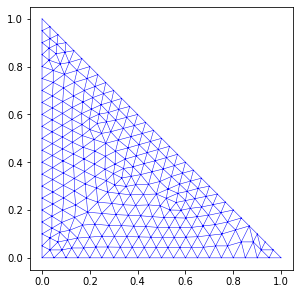

In [8]:
from matplotlib import gridspec

fig, ax = plt.subplots(figsize=(7.5, 4))
axm.Domains[1].plot(fig=fig, ax=ax)

plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.savefig("axisvm_geom.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{axisvm_geom.pdf}}
\caption{Geometry}
\end{figure}  
"""
doc['Model Information'].append(NoEscape(content))


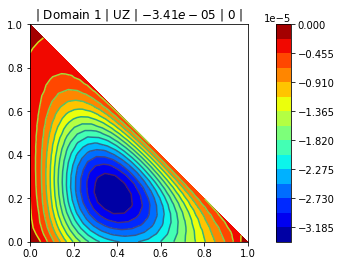

In [9]:
fig, ax = plt.subplots(figsize=(7.5, 4))
mpl_kw = dict(nlevels=15, cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[1].plot_dof_solution(component='uz', mpl_kw=mpl_kw, case=3)

plt.savefig("axisvm_UZ.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{axisvm_UZ.pdf}}
\caption{Degree of Freedom Solution}
\end{figure}  
"""
doc['Results', 'ULS', 'Cases'].append(NoEscape(content))


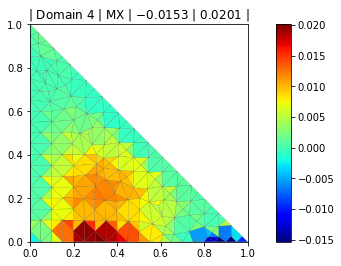

In [10]:
fig, ax = plt.subplots(figsize=(7.5, 4))
mpl_kw = dict(cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[4].plot_forces(component='mx', mpl_kw=mpl_kw, case=3)


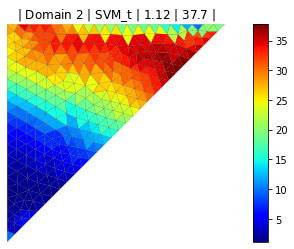

In [11]:
fig, ax = plt.subplots(figsize=(7.5, 4))
mpl_kw = dict(cmap='jet', axis='off', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[2].plot_stresses(component='svm', mpl_kw=mpl_kw, case=3, z='t')

plt.savefig("axisvm_svm.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{axisvm_svm.pdf}}
\caption{Von Mises Stress}
\end{figure}  
"""
doc['Results', 'ULS', 'Cases'].append(NoEscape(content))


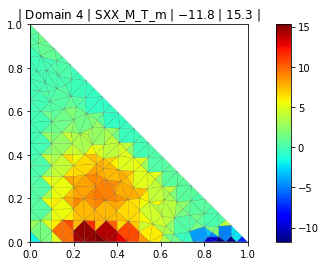

In [12]:
fig, ax = plt.subplots(figsize=(20, 4))
mpl_kw = dict(cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[4].plot_stresses(case='LC1', component='sxx_m_t', mpl_kw=mpl_kw)


In [13]:
axm.Materials


IAxisVMMaterials,Information
N Materials,4


In [14]:
axm.Materials[1]


IAxisVMMaterial,Information
Name,S 235
NationalDesignName,Eurocode
MaterialDesignName,10025-2
MaterialType,Steel
UID,1


## XLAM

In [15]:
xlam_domain_id = axm.Domains.get_xlam_domain_indices()[0]

In [16]:
stresses = axm.Domains[xlam_domain_id].xlam_surface_stresses(case='LC1')
len(stresses), len(stresses[0]), len(stresses[0, 0])


(58, 6, 13)

In [17]:
import awkward as ak
sxx_m_t = ak.flatten(stresses[:, :, 0]).to_numpy()
syy_m_t = ak.flatten(stresses[:, :, 1]).to_numpy()
sxy_m_t = ak.flatten(stresses[:, :, 2]).to_numpy()
sxx_m_b = ak.flatten(stresses[:, :, 3]).to_numpy()
syy_m_b = ak.flatten(stresses[:, :, 4]).to_numpy()
sxy_m_b = ak.flatten(stresses[:, :, 5]).to_numpy()
sxx_n = ak.flatten(stresses[:, :, 6]).to_numpy()
syy_n = ak.flatten(stresses[:, :, 7]).to_numpy()
sxy_n = ak.flatten(stresses[:, :, 8]).to_numpy()
sxz_max = ak.flatten(stresses[:, :, 9]).to_numpy()
syz_max = ak.flatten(stresses[:, :, 10]).to_numpy()
srx_max = ak.flatten(stresses[:, :, 11]).to_numpy()
sry_max = ak.flatten(stresses[:, :, 12]).to_numpy()
stresses = [
    sxx_m_t, syy_m_t, sxy_m_t,
    sxx_m_b, syy_m_b, sxy_m_b,
    sxx_n, syy_n, sxy_n,
    sxz_max, syz_max, srx_max, sry_max
]
labels = [
    r'$\sigma_{xx,m,t}$', 'syy_m_t', 'sxy_m_t',
    'sxx_m_b', 'syy_m_b', 'sxy_m_b',
    'sxx_n', 'syy_n', 'sxy_n',
    'sxz_max', 'syz_max', 'srx_max', 'sry_max'
]


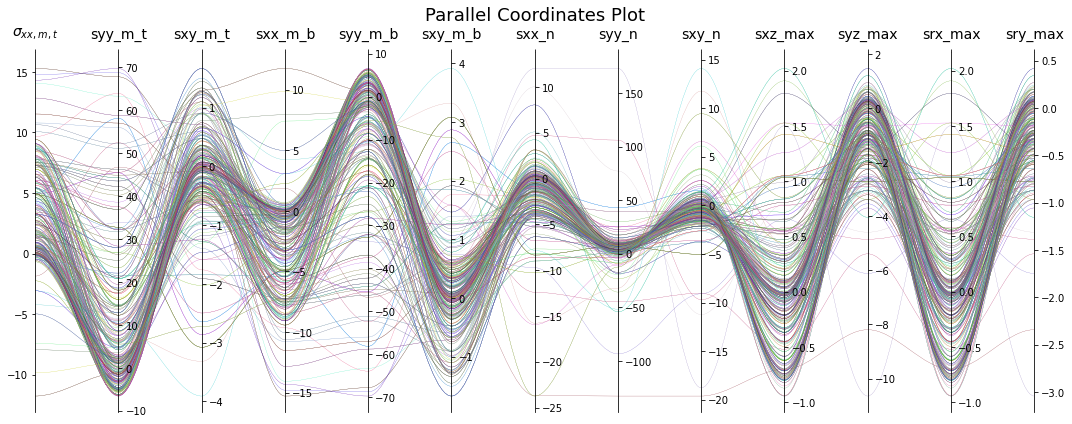

In [18]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

fig, host = plt.subplots(figsize=(15, 6))

# create some dummy data
ynames = labels
N = len(sxx_m_t)

# organize the data
ys = np.dstack(stresses)[0]
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18)

colors = plt.cm.tab10.colors
for j in range(N):
    # to just draw straight lines between the axes:
    # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

    # create bezier curves
    # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
    #   at one third towards the next axis; the first and last axis have one less control vertex
    # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
    # y-coordinate: repeat every point three times, except the first and last only twice
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none',
                              lw=0.2, edgecolor=np.random.rand(3))
    host.add_patch(patch)
plt.tight_layout()
plt.show()


In [19]:
axm.LoadCombinations.GetValidCombinationTypes()[0]


(3, 2, 1, 11, 8)

In [20]:
axm.LoadCombinations.CombinationType[1]


4

In [21]:
#combs, n = axm.LoadCombinations.GenerateAutoCombinations(axtlb.ctb_ULS, False)


### Efficiency at a single node of a surface

In [22]:
sid = axm.Domains[xlam_domain_id].MeshSurfaceIds[0]
vid = axm.Domains[xlam_domain_id].topology()[0, 0]
params = dict(
    SurfaceId=sid, SurfaceVertexType=axtlb.svtContourPoint,
    SurfaceVertexId=vid, MinMaxType=axtlb.mtMax, CombinationType=11,
    AnalysisType=axtlb.atLinearStatic, Component=axtlb.xse_M_N_0,
    Efficiency=axtlb.RXLAMSurfaceEfficiencyValues()
)
data, factors, loadcases = \
    axm.Domains[xlam_domain_id].critical_xlam_surface_efficiency(**params)
eff_max = data[-1]
factors, loadcases, eff_max

((1.5, 1.0499999523162842, 1.0499999523162842),
 (3, 5, 6),
 0.009041947312653065)

In [23]:
factors = list(map(f2str, factors))
names = [axm.LoadCases.Name[i] for i in loadcases]
expr = r" \,\,+\,\,".join([r'${}$ $\cdot$ {}'.format(f, n)
                          for f, n in zip(factors, names)])
doc['XLAM']['Efficiencies'].append(
    "Efficiency at a single node of a surface:")
doc['XLAM']['Efficiencies'].append(NewLine) 
doc['XLAM']['Efficiencies'].append(NoEscape(expr))


### All efficiencies at all nodes of all surfaces of a domain

In [42]:
params = dict(
    MinMaxType=axtlb.mtMax, CombinationType=11,
    AnalysisType=axtlb.atLinearStatic, Component=axtlb.xse_Max
)
data = axm.Domains[xlam_domain_id].critical_xlam_surface_efficiencies(**params)

In [43]:
from sigmaepsilon.math.linalg.sparse.utils import count_cols

cuts = count_cols(data)
eff_max = ak.flatten(data[:, :, -1]).to_numpy()
imax = np.argmax(eff_max)


In [26]:
# figure out surface index and node index

In [44]:
np.cumsum(cuts)

array([  6,  12,  20,  28,  36,  44,  52,  60,  68,  76,  84,  92, 100,
       108, 116, 124, 132, 140, 148, 156, 164, 172, 180, 188, 196, 204,
       212, 220, 228, 236, 244, 252, 260, 268, 276, 284, 292, 300, 308,
       316, 324, 332, 340, 348, 356, 364, 372, 380, 388, 396, 404, 410,
       418, 426, 434, 440, 446, 454], dtype=int64)

In [47]:
iS = np.where(np.cumsum(cuts) > imax)[0][0]
iN = imax - np.cumsum(cuts)[iS-1]

In [49]:
imax, (iS, iN)

(12, (2, 0))

In [50]:
sid = axm.Domains[xlam_domain_id].MeshSurfaceIds[iS]
vid = axm.Domains[xlam_domain_id].topology()[iS, iN]
params = dict(
    SurfaceId=sid, SurfaceVertexType=axtlb.svtContourPoint,
    SurfaceVertexId=vid, MinMaxType=axtlb.mtMax, CombinationType=11,
    AnalysisType=axtlb.atLinearStatic, Component=axtlb.xse_M_N_0,
    Efficiency=axtlb.RXLAMSurfaceEfficiencyValues()
)
data, factors, loadcases = \
    axm.Domains[xlam_domain_id].critical_xlam_surface_efficiency(**params)
eff_max = data[-1]
factors, loadcases, eff_max

((1.0499999523162842, 1.0499999523162842, 1.5, 1.0499999523162842),
 (3, 4, 5, 6),
 0.11071231216192245)

In [28]:
stresses = axm.Domains[xlam_domain_id].xlam_surface_stresses(case='LC1')

In [29]:
doc.build().generate_pdf('axisvm_autodoc', clean_tex=True, compiler='pdfLaTeX')
